In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [162]:
df=df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]

In [163]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

In [164]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

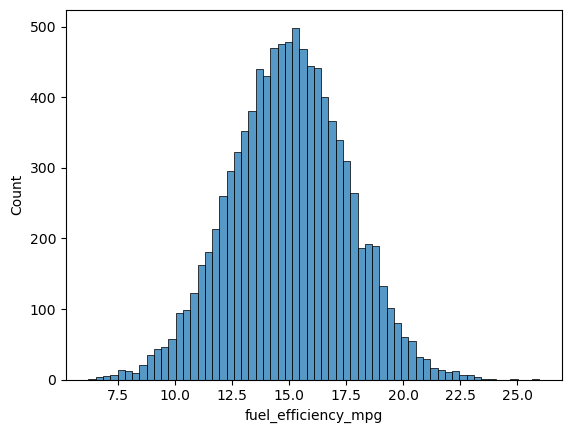

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['fuel_efficiency_mpg'])
plt.xlabel('fuel_efficiency_mpg')
plt.ylabel('Count')
plt.show()  # <-- required in scripts / some IDEs


In [167]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [168]:
for col in df.columns:
    print(col)
    #uniques values
    print(df[col].unique()[:5])
    #number of unique values
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

model_year
[2003 2007 2018 2009 2008]
24

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [169]:
df["horsepower"].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [210]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.fuel_efficiency_mpg.values)
y_val = (df_val.fuel_efficiency_mpg.values)
y_test = (df_test.fuel_efficiency_mpg.values)
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [211]:
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

In [212]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
]
def prepare_X(df):
    df_num = df[base].copy()

    # Ensure numeric (coerce bad strings to NaN), then fill with column means
    df_num = df_num.apply(pd.to_numeric, errors='coerce')
    df_num["horsepower"] = df_num["horsepower"].fillna(df_num["horsepower"].mean())

    X = df_num.values
    return X

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [213]:

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

np.float64(0.46)

In [214]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
]
def prepare_X(df):
    df_num = df[base].copy()

    # Ensure numeric (coerce bad strings to NaN), then fill with column means
    df_num = df_num.apply(pd.to_numeric, errors='coerce')
    df_num["horsepower"] = df_num["horsepower"].fillna(0)

    X = df_num.values
    return X

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [215]:

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

np.float64(0.52)

In [216]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
]
def prepare_X(df):
    df_num = df[base].copy()

    # Ensure numeric (coerce bad strings to NaN), then fill with column means
    df_num = df_num.apply(pd.to_numeric, errors='coerce')
    df_num = df_num.fillna(0)

    X = df_num.values
    return X

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [217]:

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

np.float64(0.52)

In [218]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 28.827365474598718 0.5173782638841185
0.01 24.926838421084422 0.5171115525775559
0.1 11.239661085047366 0.5187525130701629
1 1.7315979412398264 0.5222348802092528
5 0.36380750207153073 0.5228916092823455
10 0.18306246622476907 0.5229812979636569
100 0.01841801730804525 0.5230636233819926


In [205]:
def prepare_X(df):
    df_num = df[base].copy()

    # Ensure numeric (coerce bad strings to NaN), then fill with column means
    df_num = df_num.apply(pd.to_numeric, errors='coerce')
    df_num = df_num.fillna(0)

    X = df_num.values
    return X
base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
]
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
array=[]
for xx in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(xx)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = (df_train.fuel_efficiency_mpg.values)
    y_val = (df_val.fuel_efficiency_mpg.values)
    y_test = (df_test.fuel_efficiency_mpg.values)
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    array.append(rmse(y_val, y_pred))

In [206]:
array

[np.float64(0.5206531296297207),
 np.float64(0.5213388912866506),
 np.float64(0.5228069974913666),
 np.float64(0.5159516741255491),
 np.float64(0.5109129460116937),
 np.float64(0.5283406460212935),
 np.float64(0.5313910658190373),
 np.float64(0.509067038739038),
 np.float64(0.5147399129482789),
 np.float64(0.513186590829269)]

In [207]:
scores=np.array(array)

In [208]:
array

[np.float64(0.5206531296297207),
 np.float64(0.5213388912866506),
 np.float64(0.5228069974913666),
 np.float64(0.5159516741255491),
 np.float64(0.5109129460116937),
 np.float64(0.5283406460212935),
 np.float64(0.5313910658190373),
 np.float64(0.509067038739038),
 np.float64(0.5147399129482789),
 np.float64(0.513186590829269)]

In [209]:
np.std(scores)

np.float64(0.006989446427824928)

In [203]:
def prepare_X(df):
    df_num = df[base].copy()

    # Ensure numeric (coerce bad strings to NaN), then fill with column means
    df_num = df_num.apply(pd.to_numeric, errors='coerce')
    df_num = df_num.fillna(0)

    X = df_num.values
    return X
base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
]
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
array=[]
for xx in [ 9]:
    n = len(df)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(xx)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    del df_train['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train)
    
    X_val = prepare_X(df_test)
    y_pred = w0 + X_val.dot(w)
    array.append(rmse(y_test, y_pred))

In [204]:
array

[np.float64(0.5156261299185628)]